In [41]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from pandas import Series as S,DataFrame as df

In [42]:
from sklearn.datasets import load_boston

In [43]:
boston = load_boston()

In [44]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'number of house')

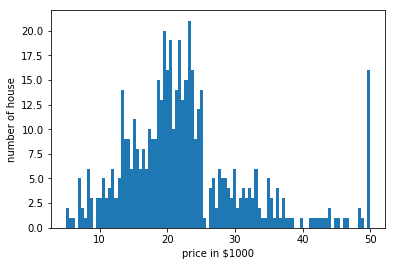

In [45]:
plt.hist(boston.target,  bins=100)
plt.xlabel('price in $1000')
plt.ylabel('number of house')

In [46]:
bostondf = df(boston.data)
bostondf.columns = boston.feature_names
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
bostondf['Price'] = boston.target

In [48]:
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
# del bostondf['price']

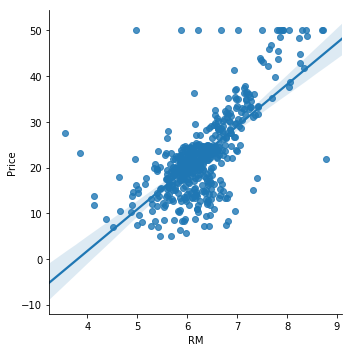

In [51]:
sns.lmplot('RM','Price', data = bostondf)

In [52]:
x = bostondf.RM
x = np.vstack([x, np.ones(len(x))]).T
y = bostondf.Price
x

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [53]:
m, b = np.linalg.lstsq(x, y, rcond= None)[0]


In [63]:
# results = np.linalg.lstsq(x, y, rcond= None)[:]
# error = results[1]
# rmse = np.sqrt(error/ len(X))
# print('The root Mean Sq. error is %.2f' %rmse)

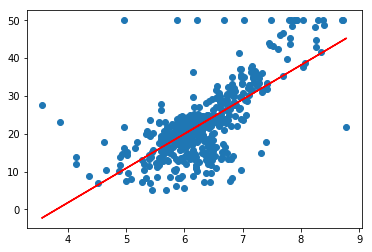

In [54]:
plt.plot(bostondf.RM, bostondf.Price, 'o')
x = bostondf.RM
plt.plot(x, m*x + b, 'r', label='best fit line ')

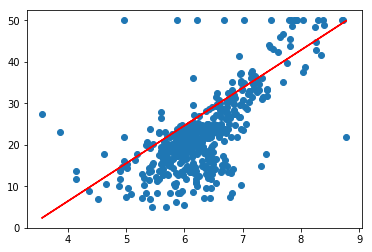

In [60]:
plt.plot(bostondf.RM, bostondf.Price, 'o')
x = bostondf.RM
plt.plot(x, m*x - 30, 'r', label='best fit line ')